In [1]:
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

In [2]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
save_dir = 'mnist_current_model'
new_graph = tf.Graph()
with tf.Session(graph=new_graph) as sess:
    # Import the previously export meta graph.
    saver = tf.train.import_meta_graph(os.path.join(save_dir, 'my-pretrained-model.meta'))
    saver.restore(sess, os.path.join(save_dir, 'my-pretrained-model'))
    print("Model restored.")
    graph = tf.get_default_graph()
    y_conv = graph.get_tensor_by_name("add_4:0")
    y_ = graph.get_tensor_by_name("Placeholder_1:0")
    correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    h_conv1_trained, h_pool1_trained, h_conv2_trained, h_pool2_trained, h_fc1_trained, y_conv_trained  = sess.run(['Relu:0', 'MaxPool:0', 'Relu_1:0', 'MaxPool_1:0', 'Relu_2:0', 'add_4:0'],
                               feed_dict={"Placeholder:0": mnist.train.images[:1,:],
                                            "Placeholder_1:0": mnist.train.labels[:1],
                                            "Placeholder_2:0": 1.0})
    accuracy_test = sess.run(accuracy, feed_dict={"Placeholder:0": mnist.test.images,
                                            "Placeholder_1:0": mnist.test.labels,
                                            "Placeholder_2:0": 1.0})
    print(mnist.test.images.shape)
    print('test accuracy %g' % accuracy_test)

INFO:tensorflow:Restoring parameters from mnist_current_model/my-pretrained-model
Model restored.
(10000, 784)
test accuracy 0.9917


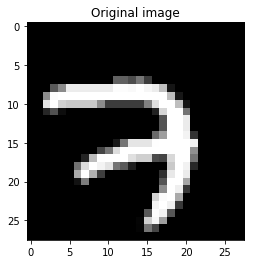

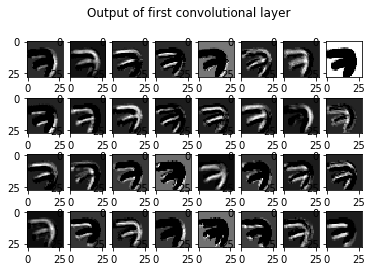

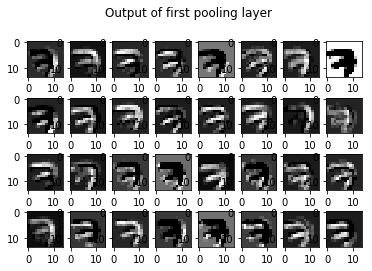

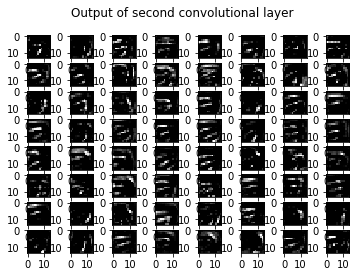

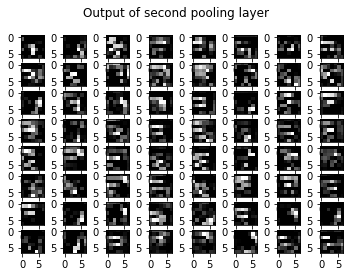

In [4]:
plt.figure(0)
plt.imshow(mnist.train.images[:1,:].reshape(28,28))
plt.gray()
plt.title("Original image")
plt.show()
plt.figure(1)
for i in np.arange(32):
    plt.subplot(4,8,i+1)
    plt.imshow(h_conv1_trained[0,:,:,i])
    plt.gray()
plt.suptitle("Output of first convolutional layer")
plt.show()
plt.figure(2)
for i in np.arange(32):
    plt.subplot(4,8,i+1)
    plt.imshow(h_pool1_trained[0,:,:,i])
    plt.gray()
plt.suptitle("Output of first pooling layer")
plt.show()
plt.figure(3)
for i in np.arange(64):
    plt.subplot(8,8,i+1)
    plt.imshow(h_conv2_trained[0,:,:,i])
    plt.gray()
plt.suptitle("Output of second convolutional layer")
plt.show()
plt.figure(4)
for i in np.arange(64):
    plt.subplot(8,8,i+1)
    plt.imshow(h_pool2_trained[0,:,:,i])
    plt.gray()
plt.suptitle("Output of second pooling layer")
plt.show()

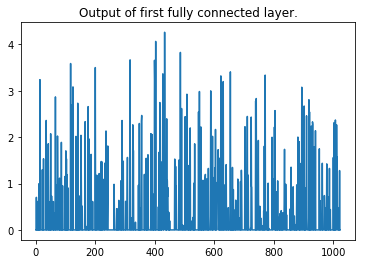

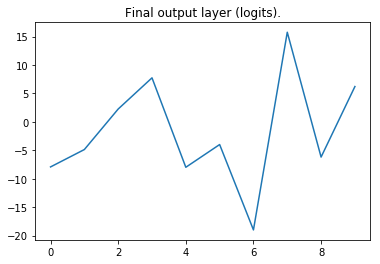

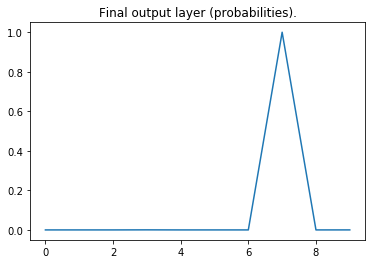

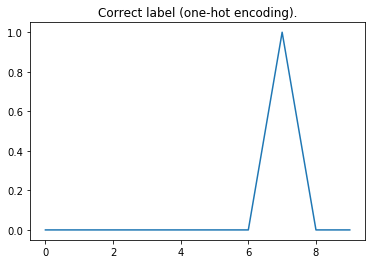

In [5]:
plt.figure(5)
plt.plot(h_fc1_trained[0,:])
plt.title("Output of first fully connected layer.")
plt.show()
plt.figure(6)
plt.plot(y_conv_trained[0,:])
plt.title("Final output layer (logits).")
plt.show()
plt.figure(7)
plt.plot(np.exp(y_conv_trained[0,:])/np.sum(np.exp(y_conv_trained[0,:])))
plt.title("Final output layer (probabilities).")
plt.show()
plt.figure(8)
plt.plot(mnist.train.labels[:1,:].reshape(10,1))
plt.title("Correct label (one-hot encoding).")
plt.show()